In [1]:
import requests

resp =requests.get('https://data.covid19.go.id/public/api/update.json')

In [2]:
print(resp)

<Response [200]>


In [3]:
print(resp.headers)

{'Server': 'nginx', 'Date': 'Sat, 24 Jul 2021 09:19:45 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Sat, 24 Jul 2021 09:18:33 GMT', 'ETag': 'W/"60fbdae9-301c4"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


In [4]:
cov_id_raw  = resp.json()

print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


In [5]:
print('Tanggal pembaharuan data penambahan kasus :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus : 2021-07-24
Jumlah penambahan kasus sembuh : 39767
Jumlah penambahan kasus meninggal : 1415
Jumlah total kasus positif hingga saat ini : 3127826
Jumlah total kasus meninggal hingga saat ini: 82013


In [6]:
import requests
resp_JT = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TENGAH.json')
cov_JT_raw = resp_JT.json()

In [7]:
print('Nama-nama elemen utama:\n', cov_JT_raw.keys())

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])


In [8]:
print('\nJumlah total kasus COVID-19 di Jawa Tengah : %d' %cov_JT_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Tengah : %f.2%%' %cov_JT_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa tengah : %f.2%%' %cov_JT_raw['sembuh_persen'])


Jumlah total kasus COVID-19 di Jawa Tengah : 343210
Persentase kematian akibat COVID-19 di DKI Jakarta : 4.718685.2%
Persentase tingkat kesembuhan dari COVID-19 di DKI Jakarta : 77.943824.2%


In [10]:
import numpy as np
import pandas as pd
cov_JT = pd.DataFrame(cov_JT_raw['list_perkembangan'])
print('Info cov_Jawa Tengah :\n', cov_JT.info())
print('\nLima data teratas cov_Jawa Tengah:\n', cov_JT.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       503 non-null    int64
 1   KASUS                         503 non-null    int64
 2   MENINGGAL                     503 non-null    int64
 3   SEMBUH                        503 non-null    int64
 4   DIRAWAT_OR_ISOLASI            503 non-null    int64
 5   AKUMULASI_KASUS               503 non-null    int64
 6   AKUMULASI_SEMBUH              503 non-null    int64
 7   AKUMULASI_MENINGGAL           503 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  503 non-null    int64
dtypes: int64(9)
memory usage: 35.5 KB
Info cov_Jawa Tengah :
 None

Lima data teratas cov_Jawa Tengah:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1583625600000      1  ...                    1                             0
1  1

In [11]:
cov_JT_tidy = (cov_JT.drop(columns=[item for item in cov_JT.columns
																if item.startswith('AKUMULASI')
																or item.startswith('DIRAWAT')])
												.rename(columns=str.lower)
												.rename(columns={'kasus': 'kasus_baru'})
				  )
cov_JT_tidy['tanggal'] = pd.to_datetime(cov_JT_tidy['tanggal']*1e6, unit='ns')
print('Lima data terakhir:\n', cov_JT_tidy.tail())

Lima data terakhir:
        tanggal  kasus_baru  meninggal  sembuh
498 2021-07-19        4042        278    3673
499 2021-07-20        3423        289    4136
500 2021-07-21        4125        386    3955
501 2021-07-22        5371        402    6077
502 2021-07-23        4498        446    4094


In [12]:
cov_JT_tidy.isnull().sum()

tanggal       0
kasus_baru    0
meninggal     0
sembuh        0
dtype: int64

In [13]:
cov_JT_tidy.describe()

,kasus_baru,meninggal,sembuh
count,503.000000,503.000000,503.000000
mean,682.326044,32.182903,531.773360
std,915.233955,54.902071,739.797552
min,0.000000,0.000000,0.000000
25%,138.000000,5.000000,64.500000
50%,369.000000,15.000000,277.000000
75%,870.500000,35.000000,658.000000
max,5655.000000,446.000000,6077.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

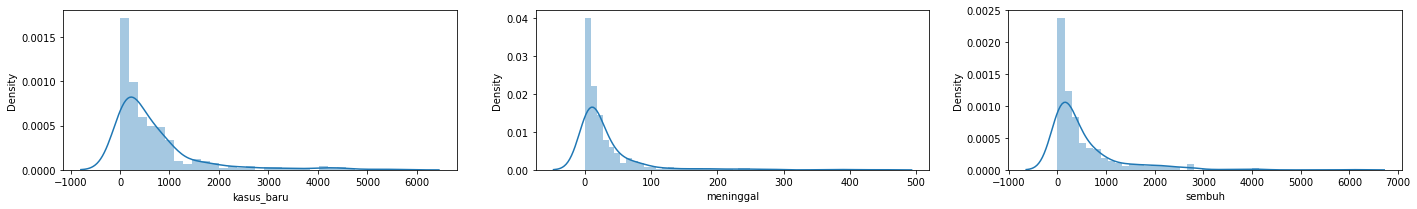

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24,10))

for i in enumerate(cov_JT_tidy.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(cov_JT_tidy[i[1]])
plt.show()

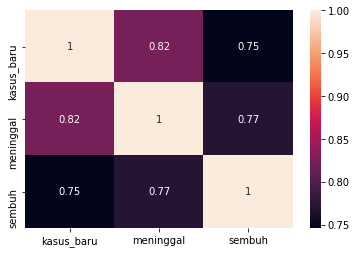

In [17]:
sns.heatmap(cov_JT_tidy.corr(), annot=True)

In [18]:
meninggal = cov_JT_tidy.sort_values('meninggal', ascending=False)
meninggal

,tanggal,kasus_baru,meninggal,sembuh
502,2021-07-23,4498,446,4094
501,2021-07-22,5371,402,6077
500,2021-07-21,4125,386,3955
486,2021-07-07,3823,359,2733
499,2021-07-20,3423,289,4136
...,...,...,...,...
30,2020-04-07,9,0,0
28,2020-04-05,3,0,0
66,2020-05-13,36,0,7
75,2020-05-22,33,0,10


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


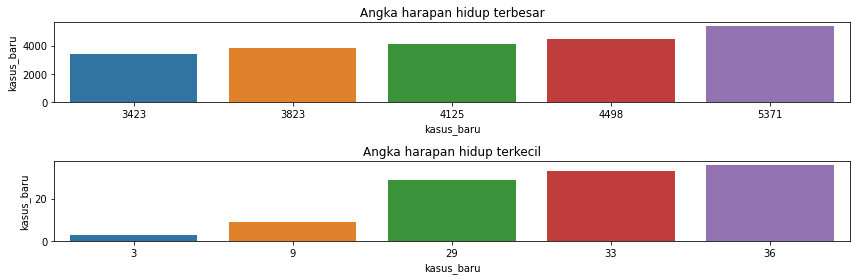

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
sns.barplot(meninggal.kasus_baru.head(), meninggal.kasus_baru.head())
plt.title('Angka harapan hidup terbesar')
plt.subplot(2,1,2)
sns.barplot(meninggal.kasus_baru.tail(), meninggal.kasus_baru.tail())
plt.title('Angka harapan hidup terkecil')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


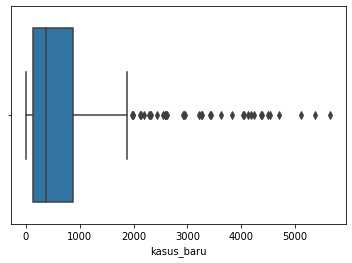

In [20]:
sns.boxplot('kasus_baru', data=cov_JT_tidy)

In [21]:
def finding_outliner(df):
  Q1 = cov_JT_tidy.quantile(0.25)
  Q3 = cov_JT_tidy.quantile(0.75)
  IQR= Q3-Q1
  lower = Q1 - (IQR*1.5)
  upper = Q3 + (IQR*1.5)
  df_final= cov_JT_tidy[(cov_JT_tidy > lower) & (cov_JT_tidy < upper)]
  return df_final

In [22]:
df_hasil = cov_JT_tidy[['kasus_baru', 'meninggal']]
df_hasil.dropna(axis=0, inplace= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df_hasil.astype(float))

In [24]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=42). fit(df_std)
labels1 = kmeans1.labels_
labels1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [26]:
new_data = pd.DataFrame(data=df_std, columns=['kasus_baru','meninggal'])
new_data['label1_kmeans'] =labels1
new_data

,kasus_baru,meninggal,label1_kmeans
0,-0.745169,-0.568539,1
1,-0.746263,-0.586771,1
2,-0.746263,-0.586771,1
3,-0.744076,-0.568539,1
4,-0.746263,-0.586771,1
...,...,...,...
498,3.674491,4.481831,0
499,2.997488,4.682387,0
500,3.765268,6.450928,0
501,5.128024,6.742647,0


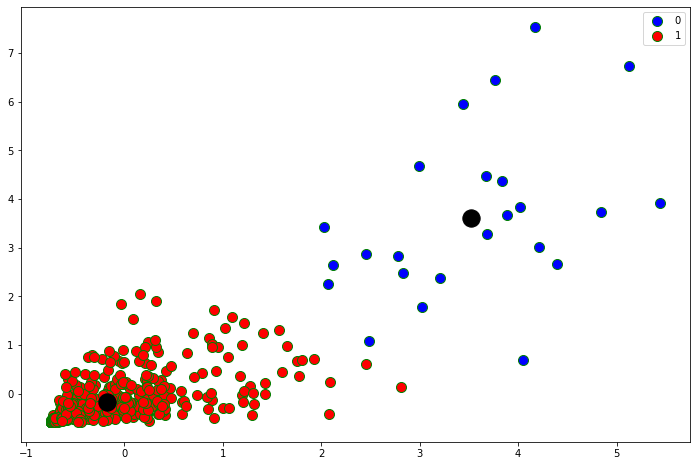

In [27]:
plt.figure(figsize=(12,8))

plt.scatter(new_data['kasus_baru'][new_data.label1_kmeans==0], new_data['meninggal'][new_data.label1_kmeans==0], label = '0' ,c='blue', s=100, edgecolors='green')
plt.scatter(new_data['kasus_baru'][new_data.label1_kmeans==1], new_data['meninggal'][new_data.label1_kmeans==1], label= '1' ,c='red', s=100, edgecolors='green')
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], c='k', s=300)

plt.legend()
plt.show()

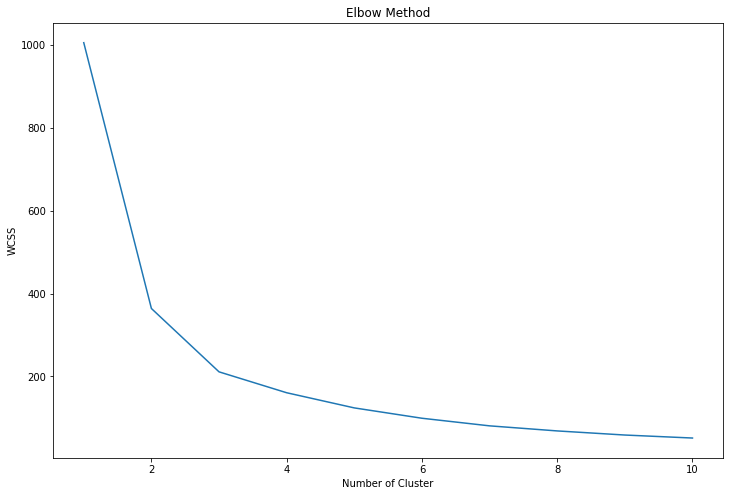

In [28]:
plt.figure(figsize=(12,8))
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [29]:
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(df_std)
labels2=kmeans2.labels_
labels2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [30]:
new_data['labels2_kmeans'] = labels2
new_data

,kasus_baru,meninggal,label1_kmeans,labels2_kmeans
0,-0.745169,-0.568539,1,0
1,-0.746263,-0.586771,1,0
2,-0.746263,-0.586771,1,0
3,-0.744076,-0.568539,1,0
4,-0.746263,-0.586771,1,0
...,...,...,...,...
498,3.674491,4.481831,0,1
499,2.997488,4.682387,0,1
500,3.765268,6.450928,0,1
501,5.128024,6.742647,0,1


In [31]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df_std, labels= labels1))
print(silhouette_score(df_std, labels= labels2))

0.8192798904350009
0.5035439912084223


In [32]:
cov_JT_tidy['K_KematianxKasus_Baru'] = kmeans1.labels_
cov_JT_tidy

,tanggal,kasus_baru,meninggal,sembuh,K_KematianxKasus_Baru
0,2020-03-08,1,1,0,1
1,2020-03-09,0,0,0,1
2,2020-03-10,0,0,0,1
3,2020-03-11,2,1,1,1
4,2020-03-12,0,0,0,1
...,...,...,...,...,...
498,2021-07-19,4042,278,3673,0
499,2021-07-20,3423,289,4136,0
500,2021-07-21,4125,386,3955,0
501,2021-07-22,5371,402,6077,0


In [33]:
Less_Kematian = cov_JT_tidy[cov_JT_tidy['K_KematianxKasus_Baru']==0]

In [35]:
Less_Kematian.sort_values(by=['K_KematianxKasus_Baru'], ascending = True)[:10]

,tanggal,kasus_baru,meninggal,sembuh,K_KematianxKasus_Baru
473,2021-06-24,4384,70,2239,0
500,2021-07-21,4125,386,3955,0
499,2021-07-20,3423,289,4136,0
498,2021-07-19,4042,278,3673,0
497,2021-07-18,4698,178,3420,0
496,2021-07-17,5655,247,1678,0
495,2021-07-16,4188,272,2744,0
494,2021-07-15,4360,243,2210,0
493,2021-07-14,5110,237,2727,0
492,2021-07-13,3269,168,2424,0


<Figure size 432x288 with 0 Axes>

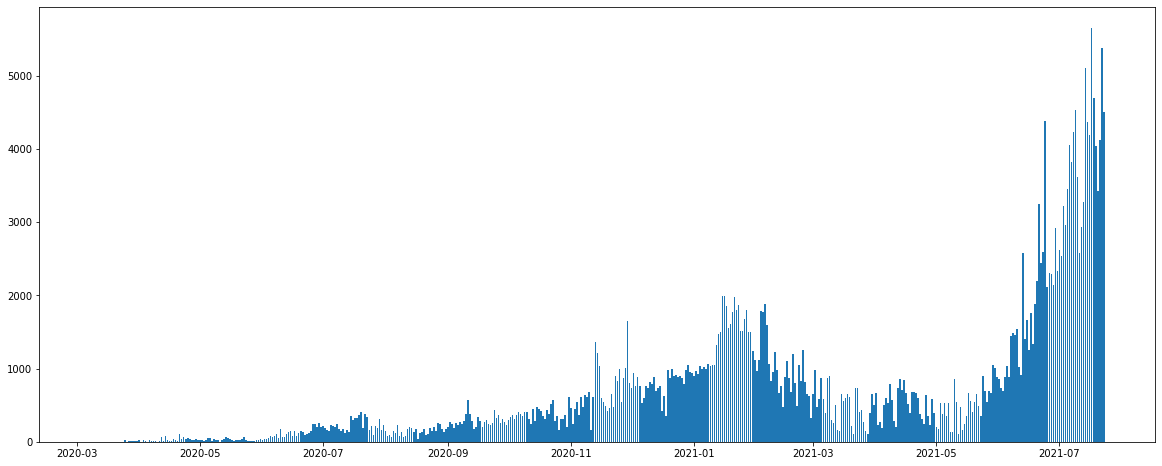

In [38]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data=cov_JT_tidy, x='tanggal', height='kasus_baru')
plt.show()

<Figure size 432x288 with 0 Axes>

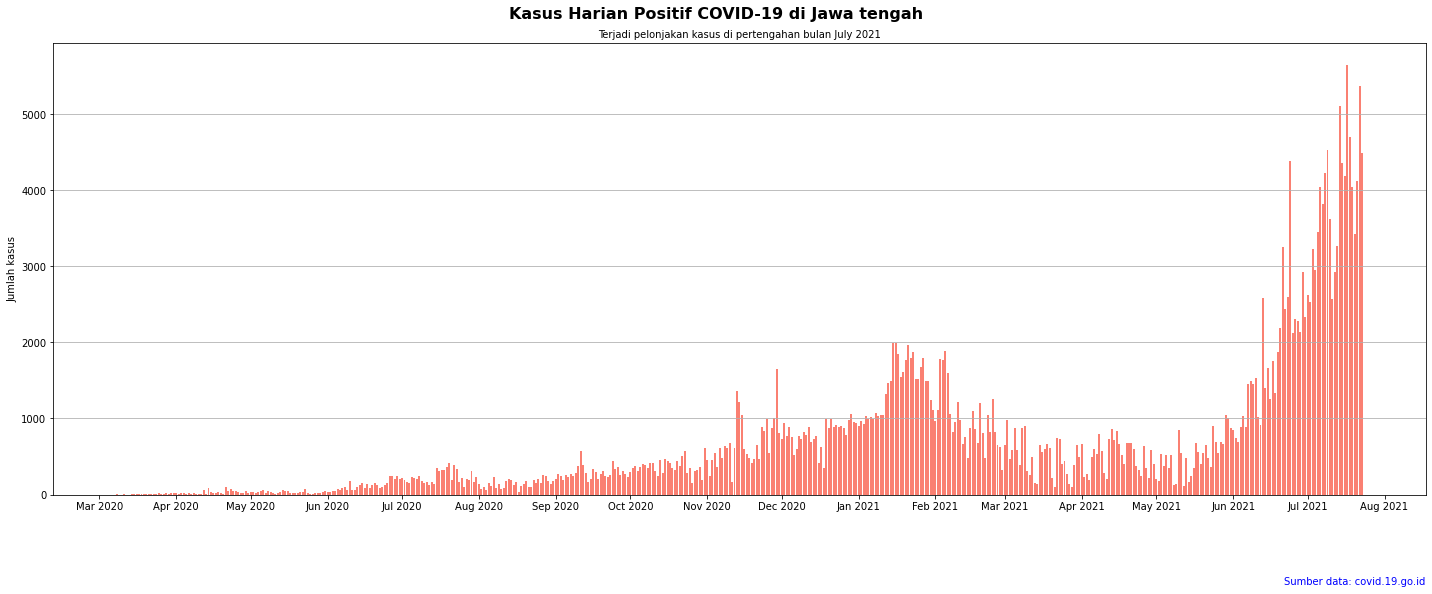

In [39]:
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data=cov_JT_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa tengah',
y=1.02, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di pertengahan bulan July 2021',
fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',
		ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

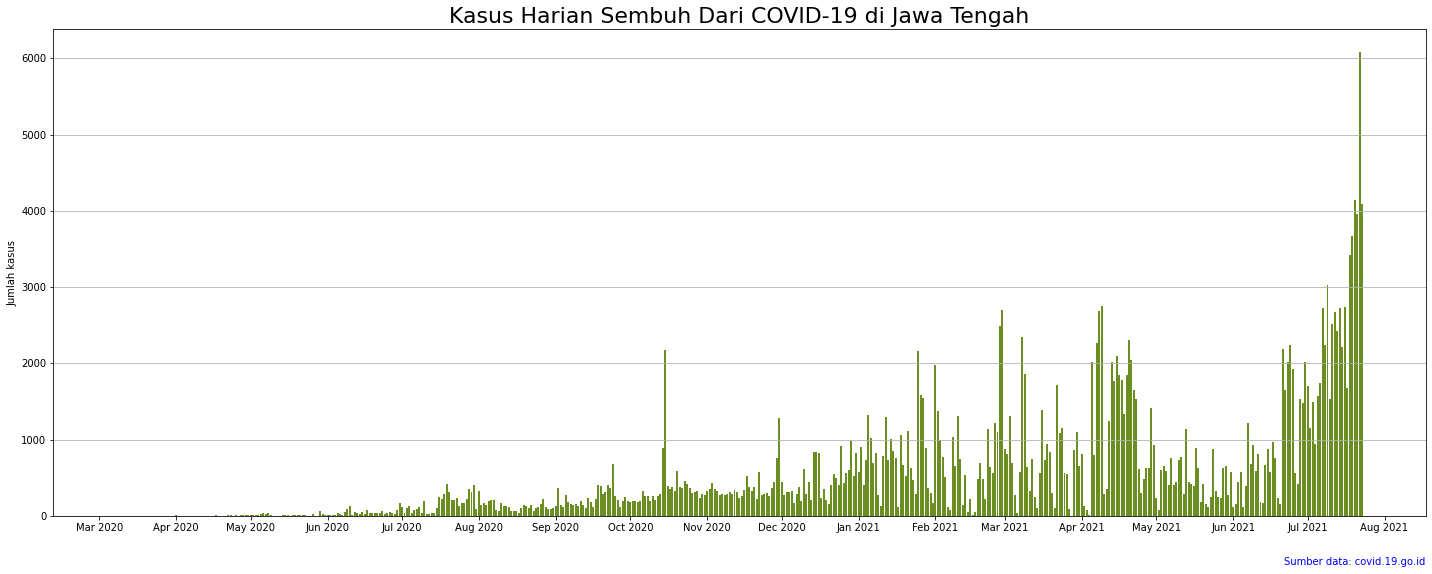

In [41]:
plt.clf()
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data=cov_JT_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Tengah',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

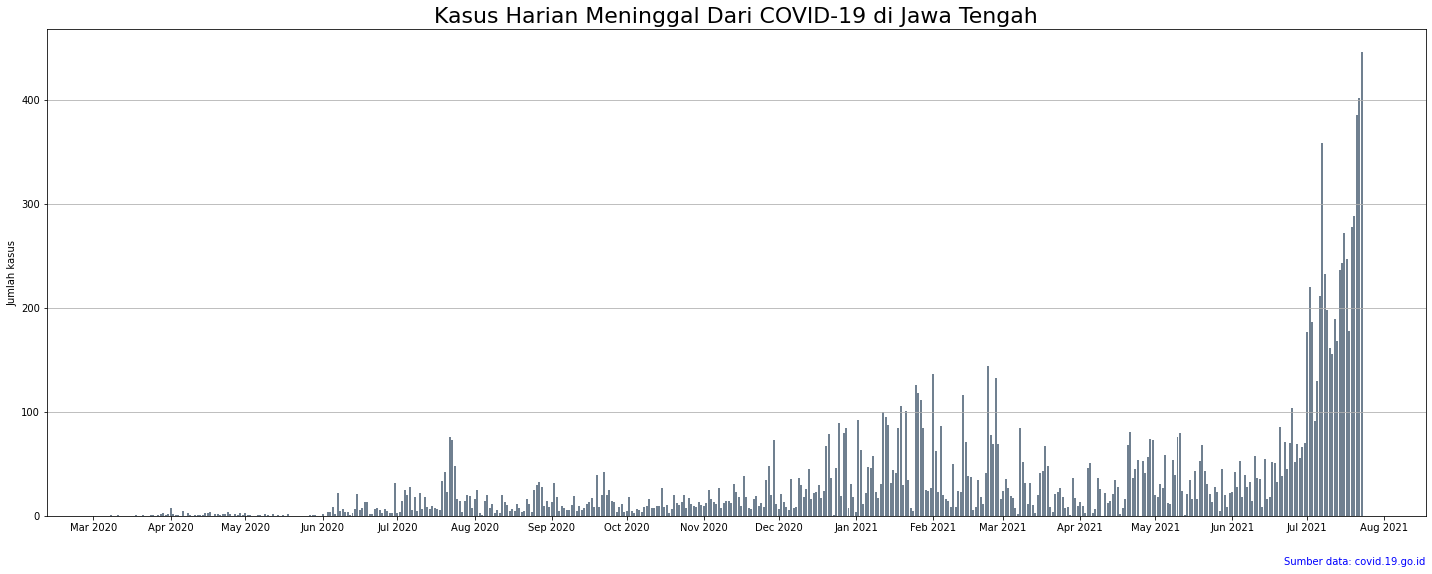

In [43]:
plt.clf()
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data=cov_JT_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Tengah',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [44]:
cov_JT_pekanan = (cov_JT_tidy.set_index('tanggal')['kasus_baru']
					  .resample('W')
					  .sum()
					  .reset_index()
					  .rename(columns={'kasus_baru': 'jumlah'})
)
cov_JT_pekanan['tahun'] = cov_JT_pekanan['tanggal'].apply(lambda x: x.year)
cov_JT_pekanan['pekan_ke'] = cov_JT_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_JT_pekanan = cov_JT_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_JT Jawa Tengah_pekanan:')
print(cov_JT_pekanan.info())
print('\nLima data teratas cov_Jawa Tengah_pekanan:\n', cov_JT_pekanan.head())

Info cov_JT Jawa Tengah_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     73 non-null     int64
 1   pekan_ke  73 non-null     int64
 2   jumlah    73 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB
None

Lima data teratas cov_Jawa Tengah_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       1
1   2020        11       5
2   2020        12      12
3   2020        13      64
4   2020        14      91


In [45]:
cov_JT_pekanan['jumlah_pekanlalu'] = cov_JT_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_JT_pekanan['lebih_baik'] = cov_JT_pekanan['jumlah'] < cov_JT_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_JT_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       1                 0       False
1   2020        11       5                 1       False
2   2020        12      12                 5       False
3   2020        13      64                12       False
4   2020        14      91                64       False
5   2020        15     123                91       False
6   2020        16     212               123       False
7   2020        17     350               212       False
8   2020        18     175               350        True
9   2020        19     246               175       False


<Figure size 432x288 with 0 Axes>

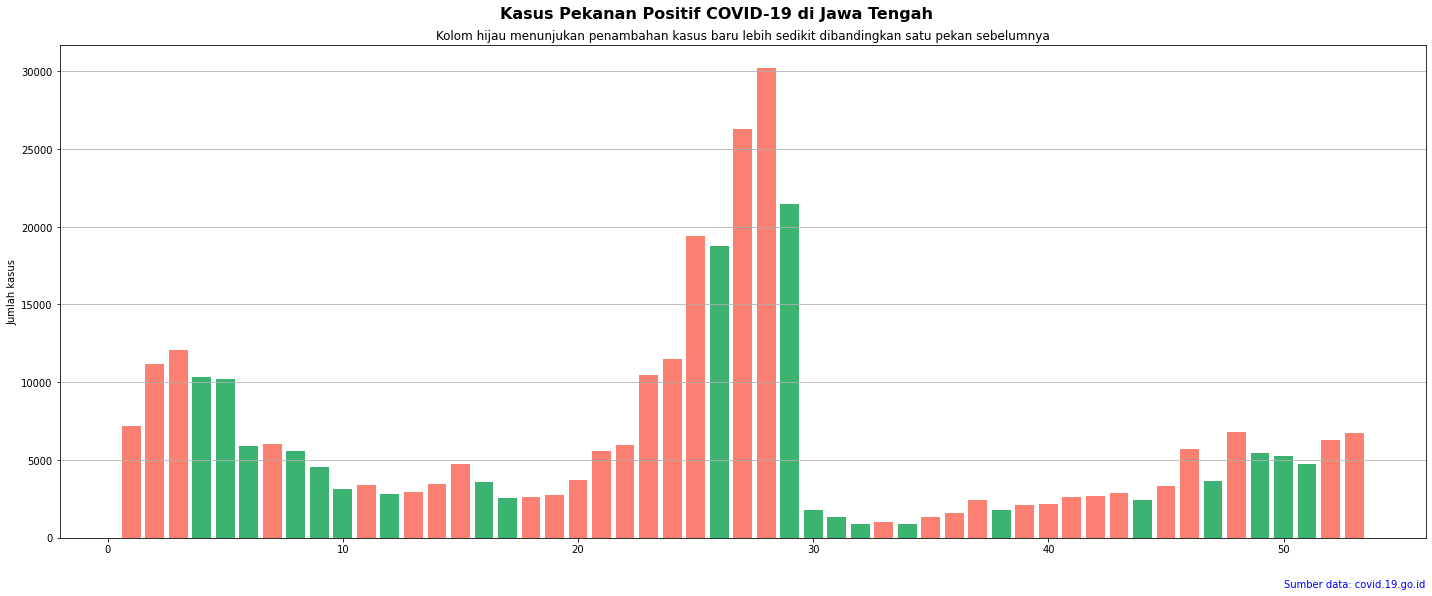

In [46]:
plt.clf()
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data=cov_JT_pekanan, x='pekan_ke', height='jumlah',
color=['mediumseagreen' if x is True else 'salmon' for x in cov_JT_pekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Tengah',
y=1.02, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [48]:
cov_JT_akumulasi = cov_JT_tidy[['tanggal']].copy()
cov_JT_akumulasi['akumulasi_aktif'] = (cov_JT_tidy['kasus_baru'] - cov_JT_tidy['sembuh'] - cov_JT_tidy['meninggal']).cumsum()
cov_JT_akumulasi['akumulasi_sembuh'] = cov_JT_tidy['sembuh'].cumsum()
cov_JT_akumulasi['akumulasi_meninggal'] = cov_JT_tidy['meninggal'].cumsum()
cov_JT_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
498,2021-07-19,61908,249220,14665
499,2021-07-20,60906,253356,14954
500,2021-07-21,60690,257311,15340
501,2021-07-22,59582,263388,15742
502,2021-07-23,59540,267482,16188


<Figure size 432x288 with 0 Axes>

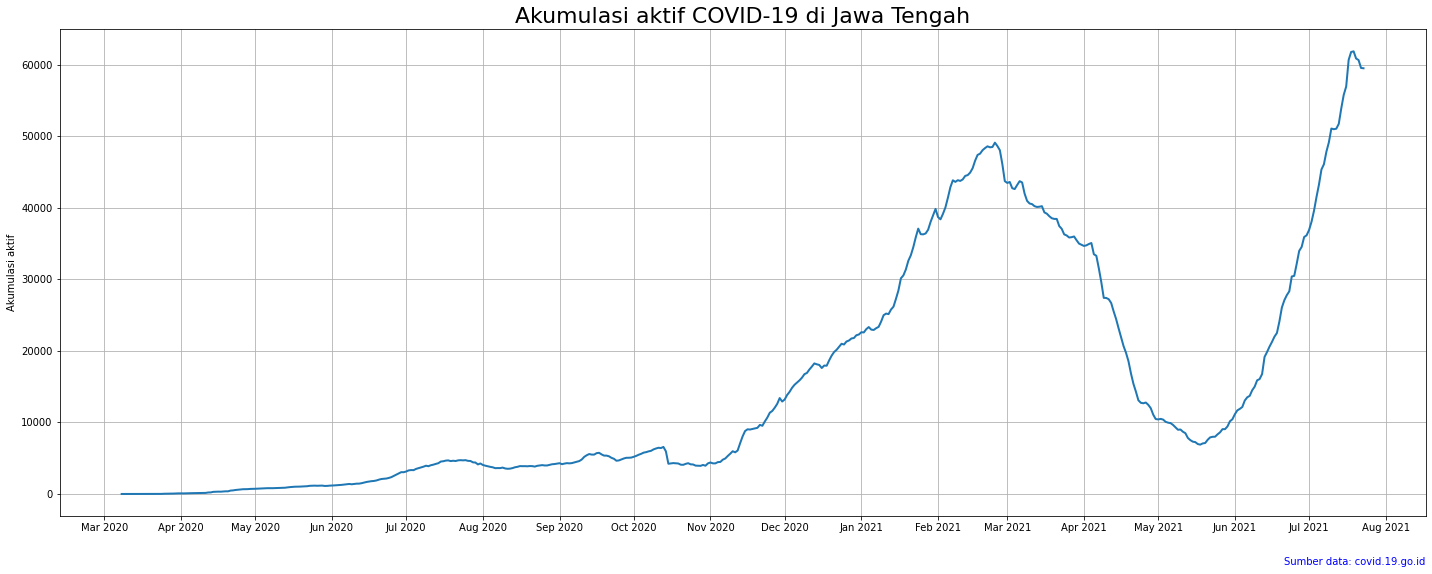

In [50]:
plt.clf()
fig, ax = plt.subplots(figsize=(20,8))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_JT_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Tengah',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

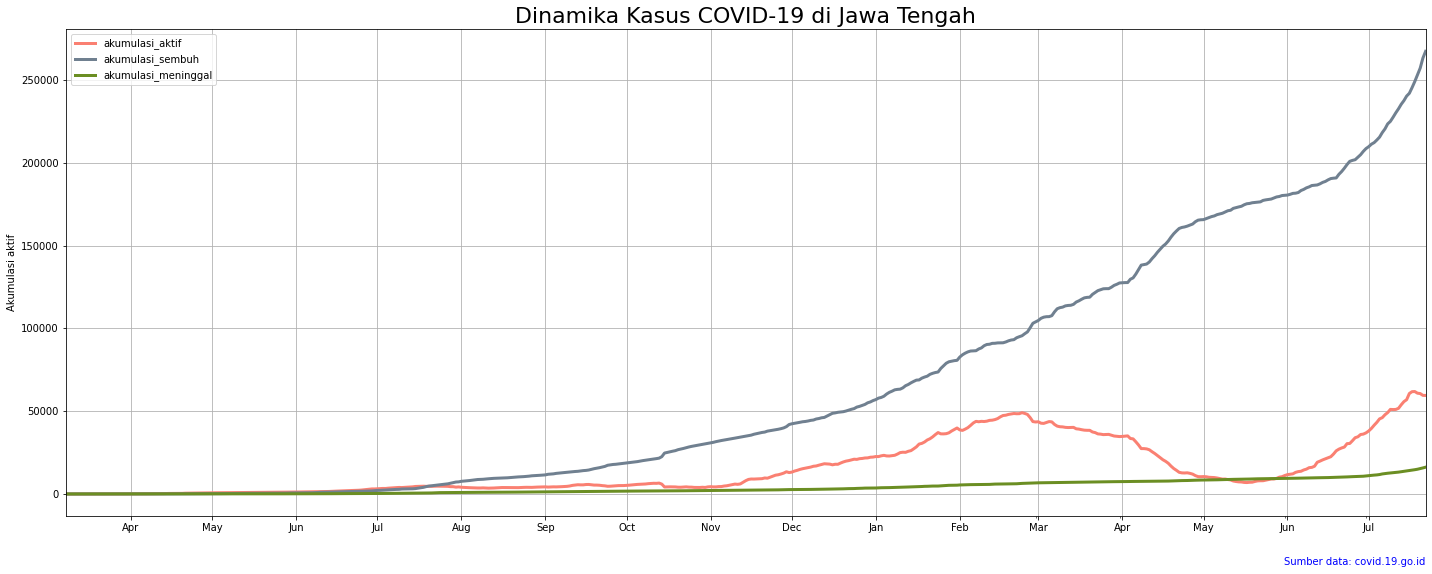

In [51]:
plt.clf()
fig, ax = plt.subplots(figsize=(20,8))
cov_JT_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3,
color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Tengah',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()